# Household Vehicle Ownership – New Jersey
New Jersey is the densest state in the US, and counties like Hudson include some of the highest rates of public transit use.

Below are some stats about household car ownership in NJ.

In [1]:
from utz import *
from hhvs import *
import ire
from ire import export
import requests
ire.chdir(NJ)

In [2]:
year = 2023
subtitle = f'NJ counties, {year}'
plot_kwargs = dict(subtitle=subtitle)
abs_plot = partial(plot_utils.abs_plot, **plot_kwargs)
pct_plot = partial(plot_utils.pct_plot, **plot_kwargs)

In [3]:
url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E&for=county:*&in=state:34'
json_path = f'vehicles{year}.json'
if not exists(json_path):
    res = requests.get(url)
    with open(json_path, 'wb') as f:
        f.write(res.content)
d = pd.read_json(json_path)
d

,0,1,2,3,4,5,6,7
0,NAME,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E,state,county
1,"Atlantic County, New Jersey",12097,38069,40190,14578,6224,34,001
2,"Bergen County, New Jersey",27511,130580,131193,48478,18676,34,003
3,"Burlington County, New Jersey",4997,57132,74427,29210,13711,34,005
4,"Camden County, New Jersey",22803,65638,78364,23850,11015,34,007
5,"Cape May County, New Jersey",2424,18049,20306,4764,1973,34,009
6,"Cumberland County, New Jersey",6528,16880,18310,8409,4355,34,011
7,"Essex County, New Jersey",74581,126857,87302,24649,9067,34,013
8,"Gloucester County, New Jersey",6780,33277,47143,17358,8833,34,015
9,"Hudson County, New Jersey",105746,142798,42581,10450,4168,34,017


## Households x Vehicles x County

Source: [api.census.gov].

[api.census.gov]: https://api.census.gov/data/2021/acs/acs1?get=NAME,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E&for=county:*&in=state:34

### Households

In [4]:
hhs = d.copy()
hhs.columns = hhs.iloc[0]
hhs = hhs.iloc[1:]
hhs = (
    sxs(
        hhs.NAME.str.extract(r'(?P<County>.*) County, New Jersey'),
        hhs,
    )
    .set_index('County')
    .drop(columns=['NAME', 'state'])
)
hhs = hhs.rename(columns={
    'B08201_002E': '0 vehicles',
    'B08201_003E': '1 vehicle',
    'B08201_004E': '2 vehicles',
    'B08201_005E': '3 vehicles',
    'B08201_006E': '4+ vehicles',
    'county': 'ccode',
})
hhs.columns.name = 'Household vehicles'
ccode = hhs.ccode
hhs = (
    hhs
    .drop(columns='ccode')
    .astype(int)
)
hhs_totals = hhs.sum(1).rename('Total households')
hhst = sxs(hhs, hhs_totals).sort_values('Total households', ascending=False)
hhs = hhst.drop(columns='Total households')
hhs.columns = hhs.columns.copy()
hhs.columns.name = 'Household vehicles'
export(hhst, 'hh', per_page=50)

Saved parquet to /Users/ryan/c/hccs/household-vehicles/nj/.ire/hh.parquet


,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles,Total households
County,,,,,,
Bergen,27511,130580,131193,48478,18676,356438
Essex,74581,126857,87302,24649,9067,322456
Middlesex,23152,110689,114572,42566,20121,311100
Hudson,105746,142798,42581,10450,4168,305743
Monmouth,15270,75708,107082,35741,19194,252995
Ocean,15354,81177,102271,31209,15816,245827
Union,21332,70343,78368,26138,9914,206095
Camden,22803,65638,78364,23850,11015,201670
Morris,8714,54627,86914,29397,13540,193192


### Percentages

In [5]:
hhs_pcts = hhs.div(hhs_totals, axis=0).sort_values('0 vehicles', ascending=False)
hhsp_exp = hhs_pcts.copy()
hhs_pcts.columns = ['0', '1', '2', '3', '4+']
hhs_pcts.columns.name = 'Household vehicles'
export(hhsp_exp, 'hh_pct', per_page=50, fmts={ float: '.1%' })

Saved parquet to /Users/ryan/c/hccs/household-vehicles/nj/.ire/hh_pct.parquet


Household vehicles,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles
County,,,,,
Hudson,0.345866,0.467052,0.139271,0.034179,0.013632
Essex,0.231290,0.393409,0.270741,0.076441,0.028119
Passaic,0.150625,0.346932,0.327479,0.113150,0.061814
Cumberland,0.119819,0.309827,0.336074,0.154345,0.079935
Camden,0.113071,0.325472,0.388575,0.118263,0.054619
Mercer,0.112021,0.352035,0.380130,0.106873,0.048941
Atlantic,0.108827,0.342476,0.361557,0.131147,0.055992
Union,0.103506,0.341313,0.380252,0.126825,0.048104
Bergen,0.077183,0.366347,0.368067,0.136007,0.052396


## 

### Households

Saved plotly to /Users/ryan/c/hccs/household-vehicles/nj/.ire/households_by_vehicle_count.json


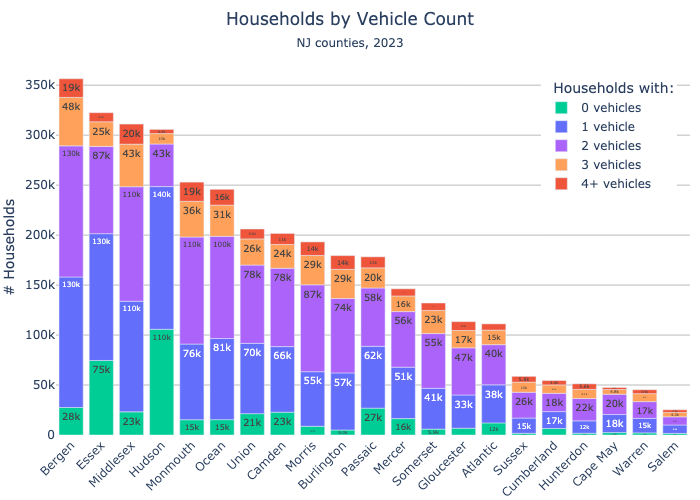

In [6]:
abs_plot(
    hhs,
    melt='# Households',
    title='Households by Vehicle Count',
    legend=ur_legend('  Households with:'),
    name='households_by_vehicle_count',
)

### Percentages

Saved plotly to /Users/ryan/c/hccs/household-vehicles/nj/.ire/households_by_vehicle_count_pcts.json


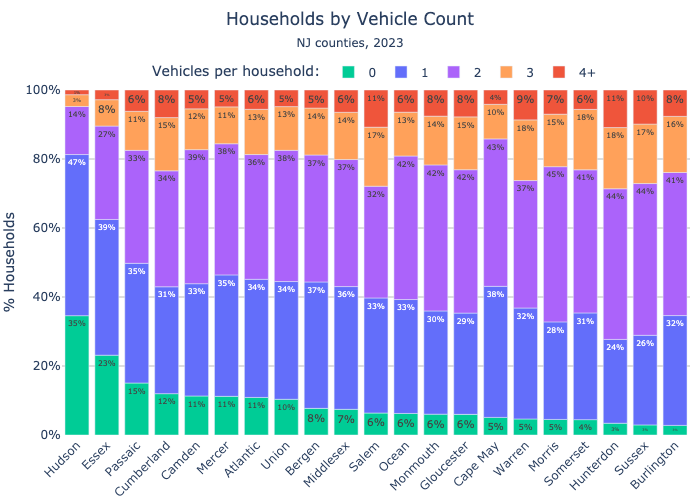

In [7]:
pct_plot(
    hhs_pcts,
    melt='% Households',
    title='Households by Vehicle Count',
    name='households_by_vehicle_count_pcts',
)

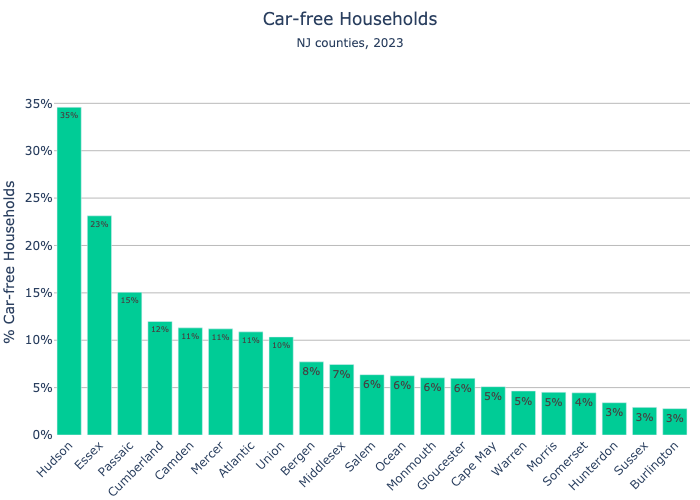

In [8]:
plot(
    hhs_pcts[['0']],
    melt='% Car-free Households',
    title='Car-free Households',
    subtitle=subtitle,
    pct=True,
    yrange=None,
    layout=dict(**pct_layout, showlegend=False),
    name='car_free_households',
    export=False,
)

In [9]:
columns = {
    '1 vehicle': '1-vehicle households',
    '2 vehicles': '2-vehicle households',
    '3 vehicles': '3-vehicle households',
    '4+ vehicles': '4+-vehicle households',
}
vhs = hhs.copy().rename(columns=columns)[columns.values()]
for i in range(1, 5):
    s = '4+' if i == 4 else f'{i}'
    col = f'{s}-vehicle households'
    vhs[col] *= i
vhs_totals = vhs.sum(1).rename('Total vehicles')
vhst = sxs(vhs, vhs_totals).sort_values('Total vehicles', ascending=False)
vhs = vhst.drop(columns='Total vehicles')
vhs.columns = vhs.columns.copy()
vhs.columns.name = 'Household vehicles'
vhs

Household vehicles,1-vehicle households,2-vehicle households,3-vehicle households,4+-vehicle households
County,,,,
Bergen,130580,262386,145434,74704
Middlesex,110689,229144,127698,80484
Monmouth,75708,214164,107223,76776
Ocean,81177,204542,93627,63264
Essex,126857,174604,73947,36268
Morris,54627,173828,88191,54160
Burlington,57132,148854,87630,54844
Union,70343,156736,78414,39656
Camden,65638,156728,71550,44060


## 

### Households

Saved plotly to /Users/ryan/c/hccs/household-vehicles/nj/.ire/vehicles_by_household_count.json


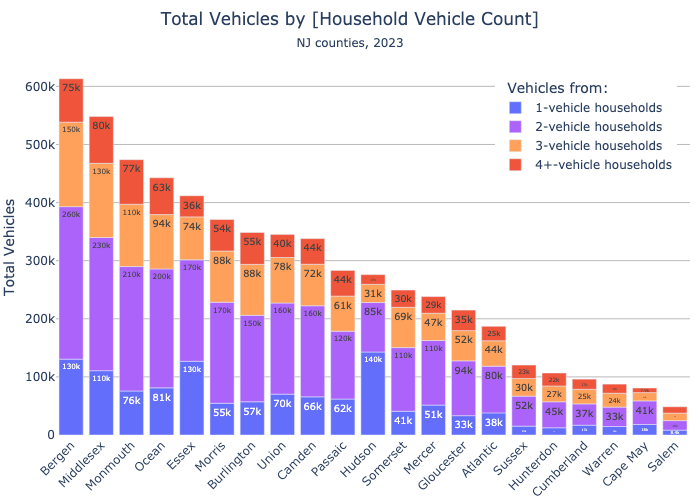

In [10]:
abs_plot(
    vhs,
    melt='Total Vehicles',
    title='Total Vehicles by [Household Vehicle Count]',
    colors=colors[1:],
    layout=abs_layout,
    legend=ur_legend('  Vehicles from:'),
    name='vehicles_by_household_count',
)

In [11]:
vhs_pcts = vhs.div(vhs_totals, axis=0).sort_values('1-vehicle households', ascending=False)
vhs_pcts.columns = ['1', '2', '3', '4+']
vhs_pcts.columns.name = 'Household vehicles'
vhs_pcts

Household vehicles,1,2,3,4+
County,,,,
Hudson,0.517418,0.308578,0.113594,0.060410
Essex,0.308148,0.424130,0.179624,0.088098
Cape May,0.223254,0.502344,0.176783,0.097619
Passaic,0.218389,0.412288,0.213679,0.155644
Mercer,0.216148,0.466796,0.196858,0.120198
Bergen,0.212982,0.427963,0.237209,0.121846
Union,0.203805,0.454111,0.227189,0.114895
Atlantic,0.203492,0.429658,0.233773,0.133077
Middlesex,0.201982,0.418135,0.233019,0.146865


### Percentages

Saved plotly to /Users/ryan/c/hccs/household-vehicles/nj/.ire/vehicles_by_household_count_pcts.json


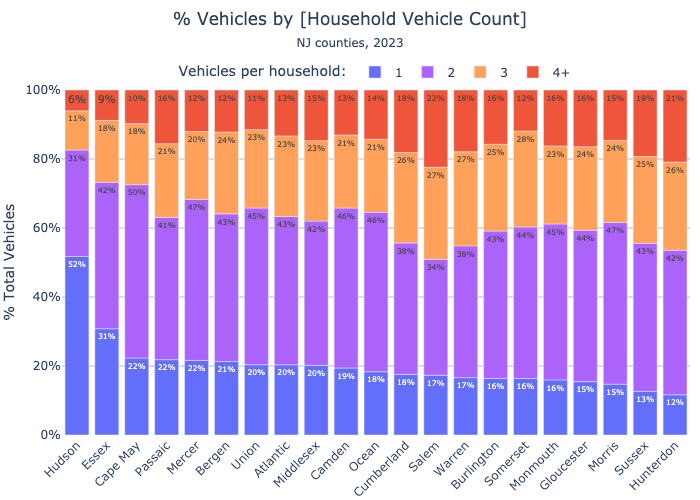

In [12]:
pct_plot(
    vhs_pcts,
    melt='% Total Vehicles',
    title='% Vehicles by [Household Vehicle Count]',
    colors=colors[1:],
    name='vehicles_by_household_count_pcts',
)